In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [85]:
from nb.NBClassifier import NBClassifier

In [86]:
wines_df = pd.read_csv('data/winequality-red.csv')

In [87]:
wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [88]:
wines_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [89]:
wines_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


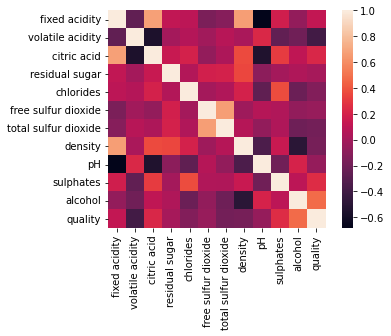

In [90]:
sns.heatmap(wines_df.corr(), square=True, fmt='g')
plt.show()

In [172]:
wines_df.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [92]:
import plotly.express as px

In [166]:
px.histogram(wines_df, x='quality',color='quality')

### Let's view our quality samples in a scatterplot fashion. Maybe we might find some outliers

### From our initial corr matrix we were able to see that alcohol has a good influence on the quality of the wine
- Let's try to visualize using a boxplot

In [94]:
fig = px.box(
    wines_df,
    x = 'quality',
    y = 'alcohol',
    color = 'quality',
    boxmode="overlay"
)
fig.show()

### From this visualization we can sort of get the intuition that having a higher quality means probably having higher alcohol content

## Let's try to visualize what factors affect alcohol content

### Interestingly, having a high alcohol content means having a low density as depicted in our visualization

In [95]:
wines_df[['alcohol', 'density']].corr()

,alcohol,density
alcohol,1.00000,-0.49618
density,-0.49618,1.00000


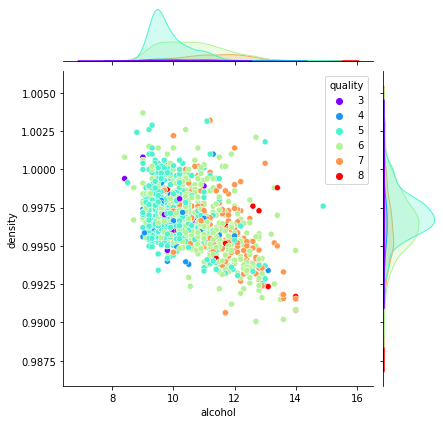

In [96]:
fig = sns.jointplot(data = wines_df,y ='density', x = 'alcohol', kind='scatter', hue='quality', palette='rainbow')

### Next we will try chlorides

In [97]:
wines_df[['chlorides', 'alcohol']].corr()

,chlorides,alcohol
chlorides,1.000000,-0.221141
alcohol,-0.221141,1.000000


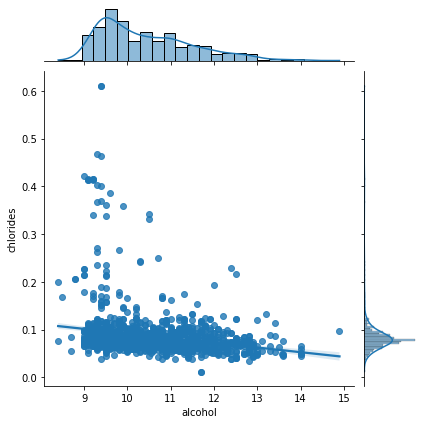

In [98]:
fig = sns.jointplot(data = wines_df, y = 'chlorides', x = 'alcohol', kind='reg', palette='rainbow')

### Mostly it is falling in the range of 0.1 so not really much help there

## Next let's try to analyze the effect of volatile acidity on the quality

In [99]:
wines_df[['volatile acidity', 'quality']].corr()

,volatile acidity,quality
volatile acidity,1.000000,-0.390558
quality,-0.390558,1.000000


In [100]:
vol_vs_quality =  px.box(
    wines_df,
    x = 'quality',
    y = 'volatile acidity',
    color = 'quality',
    boxmode="overlay"
)
vol_vs_quality.show()

## From this boxplot it is kind of clear that having a lower volatile acidity results in higher quality!

### So let's try to see what factors affect the volatile acidity itself!

#### Citric Acid

In [101]:
wines_df[['volatile acidity', 'citric acid']].corr()

,volatile acidity,citric acid
volatile acidity,1.000000,-0.552496
citric acid,-0.552496,1.000000


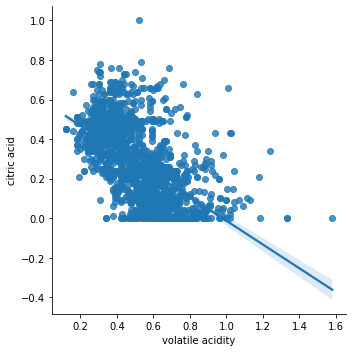

In [102]:
volatile_acid_vs_citric_acid = sns.lmplot(data = wines_df, x = 'volatile acidity', y = 'citric acid')
plt.show()

In [103]:
wines_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [104]:
wines_df[['total sulfur dioxide', 'quality']].corr()

,total sulfur dioxide,quality
total sulfur dioxide,1.0000,-0.1851
quality,-0.1851,1.0000


In [105]:
so_vs_quality =  px.box(
    wines_df,
    x = 'quality',
    y = 'total sulfur dioxide',
    color = 'quality',
    boxmode="overlay"
)
so_vs_quality.show()

### Next we try to analyze the effect of free sulfur dioxide on total sulfur dioxide

In [106]:
wines_df[['free sulfur dioxide', 'total sulfur dioxide']].corr()

,free sulfur dioxide,total sulfur dioxide
free sulfur dioxide,1.000000,0.667666
total sulfur dioxide,0.667666,1.000000


In [107]:
px.scatter(wines_df, x = 'free sulfur dioxide', y = 'total sulfur dioxide', color = 'quality')

## Preprocessing

### Preparing the features and the labels

### Recall during our visualization we were seeing some outliers.
- Outlier removal is indeed a part of the preprocessing pipeline so let's do it

### Importing our own zscore filter

Note: Smaller size datasets might not really help that much and might lead to worse performance. As in this case probably 

In [108]:
from preprocessing.ZScore import ZScore

In [21]:
transformer = ZScore(df = wines_df, threshold = 3)

In [22]:
wines_df = transformer.transform()

In [109]:
y = wines_df['quality']

In [110]:
X = wines_df.drop(['quality'], axis = 1)

In [111]:
X = np.array(X)

In [112]:
y = np.array(y)

### Scaling the values to mean to zero and variance to 1

In [113]:
scaler = StandardScaler()

In [114]:
X = scaler.fit_transform(X)

### Let's have a look at the class distribution

In [115]:
wines_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

It is pretty clear that certain classes are under-represented in our dataset so it might lead to a higher error while actually seeing unseen samples

### So we oversample our data!

In [120]:
from imblearn.over_sampling import SMOTE 
smote=SMOTE()
X,y=smote.fit_resample(X,y)

In [121]:
from collections import Counter

In [124]:
resamp_data = {}
resamp_data = Counter(y)

In [125]:
resamp_data

Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})

### Now that is better for our classification for sure!

## Training

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Competitions!

## 1. Decision Tree

### scikit-learn

In [127]:
clf_pruned = DecisionTreeClassifier()
start = time.time()
clf_pruned.fit(X_train, y_train)
end = time.time()
print("Inference time: {}".format(end - start))

Inference time: 0.0475006103515625


In [128]:
y_pred = clf_pruned.predict(X_test)

In [129]:
accuracy_score(y_test, y_pred)

0.793398533007335

### ours

In [130]:
from tree.DecisionTreeClassifier import DecisionTreeClassifier

In [131]:
clf = DecisionTreeClassifier(max_depth = 25)

In [132]:
start = time.time()
clf.fit(X_train, y_train)
end = time.time()

In [133]:
print("Inference time: {}".format(end - start))

Inference time: 195.0911889076233


### Saving the model

In [134]:
clf.save("decision-tree.pth")

### Load it again!

In [135]:
clf = DecisionTreeClassifier(max_depth = 25)

In [136]:
clf.load("decision-tree.pth")

In [137]:
y_pred = clf.predict(X_test)

In [138]:
accuracy_score(y_pred, y_test)

0.7787286063569682

## 2. Random Forest

### This wasn't implemented in python. Just using scikit-learn seemed enough

In [142]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_pred, y_test)

0.8618581907090465

## 3. SVM

In [165]:
from sklearn.svm import SVC
clf = SVC(C = 10, gamma = 1, kernel='rbf') # Rbf Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.8803230543318649

## 4. Naive Bayes

### ours

In [143]:
model = NBClassifier()

In [144]:
model.fit(X_train, y_train)

In [145]:
y_pred = model.predict(X_test)

In [146]:
accuracy_score(y_pred, y_test)

0.4547677261613692

### scikit-learn

In [147]:
from sklearn.naive_bayes import GaussianNB

In [148]:
nb = GaussianNB()

In [149]:
nb.fit(X_train, y_train)

GaussianNB()

In [150]:
y_pred = nb.predict(X_test)

In [151]:
accuracy_score(y_pred, y_test)

0.4547677261613692

## Cross-Validation
A basic dry run has been done where we can see the metrics. Now let's try to use some of that KFold magic to find how robust our models really are!

In [153]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [159]:
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=42)

In [160]:
def test(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_pred, y_test)

In [161]:
rf_scores = []
dt_scores = []
dt_scikit_scores = []
nb_scores = []
nb_scikit_scores = []
rf_train_scores = []
dt_train_scores = []
dt_train_scikit_scores = []
nb_train_scores = []
nb_train_scikit_scores = []
start = time.time()
for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    ## Scikit-learn random forest
    rf.fit(X_train, y_train)
    
    ## Scikit-learn decision forest
    clf_pruned.fit(X_train, y_train)
    
    ## Our implementation of decision tree
    clf.fit(X_train, y_train)
    
    ## Gaussian NB
    nb.fit(X_train, y_train)
    
    ## Our implementation of Gaussian NB
    model.fit(X_train, y_train)
    
    ## Appending the scores for later visualizations
    rf_scores.append(test(rf, X_test, y_test))
    nb_scores.append(test(model, X_test, y_test))
    nb_scikit_scores.append(test(nb, X_test, y_test))
    dt_scikit_scores.append(test(clf_pruned, X_test, y_test))
    dt_scores.append(test(clf, X_test, y_test))
    
    ## Appending training visualizations
    rf_train_scores.append(test(rf, X_train, y_train))
    nb_train_scores.append(test(model, X_train, y_train))
    nb_train_scikit_scores.append(test(nb, X_train, y_train))
    dt_train_scikit_scores.append(test(clf_pruned, X_train, y_train))
    dt_train_scores.append(test(clf, X_train, y_train))
end = time.time()
print("Cross validation time: {}".format(end - start))

Cross validation time: 22.284034729003906


In [157]:
import plotly.graph_objects as go

In [162]:
test_fig = go.Figure()
test_fig.add_trace(go.Scatter(y = dt_scores, name = 'Decision Tree (Ours)'))
test_fig.add_trace(go.Scatter(y = dt_scikit_scores, name = 'Decision Tree (Scikit-Learn)'))
test_fig.add_trace(go.Scatter(y = rf_scores, name = 'Random Forest (Scikit-Learn)'))
test_fig.add_trace(go.Scatter(y = nb_scores, name = 'Gaussian NB (Ours)'))
test_fig.add_trace(go.Scatter(y = nb_scikit_scores, name = 'Gaussian NB (Scikit-Learn)'))
test_fig.update_layout(title = "Test scores")
test_fig.show()

In [163]:
training_fig = go.Figure()
training_fig.add_trace(go.Scatter(y = dt_train_scores, name = 'Decision Tree (Ours)'))
training_fig.add_trace(go.Scatter(y = dt_train_scikit_scores, name = 'Decision Tree (Scikit-Learn)'))
training_fig.add_trace(go.Scatter(y = rf_train_scores, name = 'Random Forest (Scikit-Learn)'))
training_fig.add_trace(go.Scatter(y = nb_train_scores, name = 'Gaussian NB (Ours)'))
training_fig.add_trace(go.Scatter(y = nb_train_scikit_scores, name = 'Gaussian NB (Scikit-Learn)'))
training_fig.update_layout(title = "Training scores")
training_fig.show()

In [164]:
test_fig = go.Figure()
test_fig.add_trace(go.Scatter(y = rf_scores, name = 'Random Forest (Scikit-Learn)'))

Random forest clearly outperforms as it is a better approach than using a single decision tree which could possibly to lead to overfitting

### Let's try to do some feature engineering and see what can we do to improve our metrics

In [76]:
wines_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [77]:
wines_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.297150,0.698363,0.180293,0.183549,-0.148815,-0.099928,0.659927,-0.705572,0.200371,-0.015114,0.145163
volatile acidity,-0.297150,1.000000,-0.589452,0.025977,0.072709,0.013943,0.110338,-0.004957,0.251343,-0.348126,-0.213213,-0.353443
citric acid,0.698363,-0.589452,1.000000,0.184960,0.100361,-0.074441,0.005301,0.371729,-0.520311,0.302815,0.168766,0.243999
residual sugar,0.180293,0.025977,0.184960,1.000000,0.126735,-0.000844,0.095093,0.344801,-0.075140,0.076129,0.162533,0.061482
chlorides,0.183549,0.072709,0.100361,0.126735,1.000000,-0.058163,0.045025,0.328695,-0.182841,0.022107,-0.205414,-0.108787
free sulfur dioxide,-0.148815,0.013943,-0.074441,-0.000844,-0.058163,1.000000,0.660188,-0.037630,0.108831,0.055956,-0.077993,-0.071202
total sulfur dioxide,-0.099928,0.110338,0.005301,0.095093,0.045025,0.660188,1.000000,0.118965,-0.005940,-0.039024,-0.259952,-0.237745
density,0.659927,-0.004957,0.371729,0.344801,0.328695,-0.037630,0.118965,1.000000,-0.312310,0.129896,-0.468312,-0.167568
pH,-0.705572,0.251343,-0.520311,-0.075140,-0.182841,0.108831,-0.005940,-0.312310,1.000000,-0.039082,0.135624,-0.082164
sulphates,0.200371,-0.348126,0.302815,0.076129,0.022107,0.055956,-0.039024,0.129896,-0.039082,1.000000,0.241636,0.386567
